In [1]:
import pandas as pd
import numpy as np

### Series

In [3]:
bacteria = pd.Series([632, 1638, 569, 115],
                    index = ['f', 'p', 'a', 'b'])

In [4]:
bacteria

f     632
p    1638
a     569
b     115
dtype: int64

In [6]:
bacteria[[name.endswith('b') for name in bacteria.index]]

b    115
dtype: int64

In [7]:
np.log(bacteria)

f    6.448889
p    7.401231
a    6.343880
b    4.744932
dtype: float64

In [9]:
bacteria.apply(np.log)

f    6.448889
p    7.401231
a    6.343880
b    4.744932
dtype: float64

In [10]:
bacteria[bacteria>1000]

p    1638
dtype: int64

In [11]:
bacteria_dict = { 'Firmicutes': 632, 
                  'Proteobacteria': 1638, 
                  'Actinobacteria': 569,
                  'Bacteroidetes': 115 }
pd.Series(bacteria_dict)

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

In [12]:
bacteria2 = pd.Series(bacteria_dict, 
                      index=['Cyanobacteria','Firmicutes',
                             'Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [13]:
bacteria2.isnull()

Cyanobacteria      True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

### Dataframe

In [14]:
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,value,patient,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,555,2,Bacteroidetes


In [15]:
data[['phylum', 'value', 'patient']]

,phylum,value,patient
0,Firmicutes,632,1
1,Proteobacteria,1638,1
2,Actinobacteria,569,1
3,Bacteroidetes,115,1
4,Firmicutes,433,2
5,Proteobacteria,1130,2
6,Actinobacteria,754,2
7,Bacteroidetes,555,2


In [16]:
data.index

RangeIndex(start=0, stop=8, step=1)

In [17]:
data.columns

Index(['value', 'patient', 'phylum'], dtype='object')

In [19]:
data.values

array([[632, 1, 'Firmicutes'],
       [1638, 1, 'Proteobacteria'],
       [569, 1, 'Actinobacteria'],
       [115, 1, 'Bacteroidetes'],
       [433, 2, 'Firmicutes'],
       [1130, 2, 'Proteobacteria'],
       [754, 2, 'Actinobacteria'],
       [555, 2, 'Bacteroidetes']], dtype=object)

In [20]:
data.dtypes

value       int64
patient     int64
phylum     object
dtype: object

In [26]:
data.value

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [25]:
data[['value']]

,value
0,632
1,1638
2,569
3,115
4,433
5,1130
6,754
7,555


In [27]:
type(data[['value']])

pandas.core.frame.DataFrame

In [28]:
type(data['value'])

pandas.core.series.Series

In [29]:
data.loc[3]

value                115
patient                1
phylum     Bacteroidetes
Name: 3, dtype: object

In [30]:
data = pd.DataFrame([{'patient': 1, 'phylum': 'Firmicutes', 'value': 632},
                    {'patient': 1, 'phylum': 'Proteobacteria', 'value': 1638},
                    {'patient': 1, 'phylum': 'Actinobacteria', 'value': 569},
                    {'patient': 1, 'phylum': 'Bacteroidetes', 'value': 115},
                    {'patient': 2, 'phylum': 'Firmicutes', 'value': 433},
                    {'patient': 2, 'phylum': 'Proteobacteria', 'value': 1130},
                    {'patient': 2, 'phylum': 'Actinobacteria', 'value': 754},
                    {'patient': 2, 'phylum': 'Bacteroidetes', 'value': 555}])
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


In [33]:
vals = data.value
vals

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [34]:
vals[5] = 0
data.value

C:\Users\clair\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: value, dtype: int64

In [35]:
vals = data.value.copy()
vals[5] = 1000
data.value

0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: value, dtype: int64

In [36]:
data.value[[3,4,6]] = [14, 21, 5]
data

C:\Users\clair\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,14
4,2,Firmicutes,21
5,2,Proteobacteria,0
6,2,Actinobacteria,5
7,2,Bacteroidetes,555


In [38]:
data['year'] = 2013
data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,21,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,5,2013
7,2,Bacteroidetes,555,2013


In [39]:
data['treatment'] = 1
data

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,1
1,1,Proteobacteria,1638,2013,1
2,1,Actinobacteria,569,2013,1
3,1,Bacteroidetes,14,2013,1
4,2,Firmicutes,21,2013,1
5,2,Proteobacteria,0,2013,1
6,2,Actinobacteria,5,2013,1
7,2,Bacteroidetes,555,2013,1


In [41]:
%timeit data[data['phylum'].apply(lambda x: x.endswith('bacteria'))]

581 µs ± 8.01 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
%timeit data[[x.endswith('bacteria') for x in data['phylum']]]

369 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
treatment = pd.Series([0] * 4 + [1] * 2)
treatment

0    0
1    0
2    0
3    0
4    1
5    1
dtype: int64

In [45]:
data['treatment'] = treatment
data

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,21,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,5,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


In [46]:
data_nomonth = data.drop('treatment', axis=1)
data_nomonth

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,21,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,5,2013
7,2,Bacteroidetes,555,2013


In [47]:
data_nomonth.drop(0)

,patient,phylum,value,year
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,21,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,5,2013
7,2,Bacteroidetes,555,2013


In [48]:
df = pd.DataFrame({'foo': [1,2,3], 'bar':[0.4, -1.0, 4.5]})
df.values

array([[ 1. ,  0.4],
       [ 2. , -1. ],
       [ 3. ,  4.5]])

#### `Index` objects are immutable

In [49]:
bacteria

f     632
p    1638
a     569
b     115
dtype: int64

In [50]:
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [51]:
bacteria2.index = bacteria.index
bacteria2

f       NaN
p     632.0
a    1638.0
b     569.0
dtype: float64

### Import data

In [52]:
mb = pd.read_csv("Data/microbiome.csv", sep=',')
mb.head()

,Taxon,Patient,Group,Tissue,Stool
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,3,0,408,3946
3,Firmicutes,4,1,831,8605
4,Firmicutes,5,0,693,50


In [54]:
pd.read_csv("Data/microbiome.csv", skiprows=[3,4,6]).head()

,Taxon,Patient,Group,Tissue,Stool
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,5,0,693,50
3,Firmicutes,7,0,173,33
4,Firmicutes,8,1,228,80


In [55]:
pd.read_csv("Data/microbiome.csv", nrows=4)

,Taxon,Patient,Group,Tissue,Stool
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,3,0,408,3946
3,Firmicutes,4,1,831,8605


In [61]:
mb = pd.read_csv("Data/microbiome_missing.csv").head(10)

In [64]:
pd.isnull(mb).head(10)

,Taxon,Patient,Tissue,Stool
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,True
9,False,False,False,False


In [65]:
mb.head(10)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0
5,Firmicutes,6,693,50.0
6,Firmicutes,7,718,717.0
7,Firmicutes,8,173,33.0
8,Firmicutes,9,228,NaN
9,Firmicutes,10,162,3196.0


#### Indexing and Selection

In [66]:
baseball = pd.read_csv("Data/baseball.csv", index_col='id')
baseball.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [67]:
baseball.index.is_unique

True

In [69]:
player_id = baseball.player + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_id
baseball_newind.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto012006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu012006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi012006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri012006,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra052006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [70]:
baseball_newind.index.is_unique

False

In [71]:
baseball_newind.loc['wickmbo012007']

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
wickmbo012007,wickmbo01,2007,2,ARI,NL,8,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
wickmbo012007,wickmbo01,2007,1,ATL,NL,47,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
player_unique = baseball.player + baseball.team + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_unique
baseball_newind.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto01CHN2006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu01BOS2006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi01NYA2006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri01MIL2006,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra05NYA2006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [73]:
baseball_newind.index.is_unique

True

In [74]:
baseball_newind['womacto01CHN2006':'gonzalu01ARI2006']

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto01CHN2006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu01BOS2006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi01NYA2006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri01MIL2006,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra05NYA2006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
finlest01SFN2006,finlest01,2006,1,SFN,NL,139,426,66,105,21,...,40.0,7.0,0.0,46,55.0,2.0,2.0,3.0,4.0,6.0
gonzalu01ARI2006,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0


In [75]:
baseball_newind['womacto01CHN2006':'gonzalu01ARI2006'] = 5
baseball_newind.head(10)

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto01CHN2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
schilcu01BOS2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
myersmi01NYA2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
helliri01MIL2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
johnsra05NYA2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
finlest01SFN2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
gonzalu01ARI2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
seleaa01LAN2006,seleaa01,2006,1,LAN,NL,28,26,2,5,1,...,0.0,0.0,0.0,1,7.0,0.0,0.0,6.0,0.0,1.0
francju01ATL2007,francju01,2007,2,ATL,NL,15,40,1,10,3,...,8.0,0.0,0.0,4,10.0,1.0,0.0,0.0,1.0,1.0
francju01NYN2007,francju01,2007,1,NYN,NL,40,50,7,10,0,...,8.0,2.0,1.0,10,13.0,0.0,0.0,0.0,1.0,1.0


In [76]:
baseball_newind.query('ab > 500')

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
vizquom01SFN2007,vizquom01,2007,1,SFN,NL,145,513,54,126,18,...,51.0,14.0,6.0,44,48.0,6.0,1.0,14.0,3.0,14.0
thomafr04TOR2007,thomafr04,2007,1,TOR,AL,155,531,63,147,30,...,95.0,0.0,0.0,81,94.0,3.0,7.0,0.0,5.0,14.0
rodriiv01DET2007,rodriiv01,2007,1,DET,AL,129,502,50,141,31,...,63.0,2.0,2.0,9,96.0,1.0,1.0,1.0,2.0,16.0
griffke02CIN2007,griffke02,2007,1,CIN,NL,144,528,78,146,24,...,93.0,6.0,1.0,85,99.0,14.0,1.0,0.0,9.0,14.0
delgaca01NYN2007,delgaca01,2007,1,NYN,NL,139,538,71,139,30,...,87.0,4.0,0.0,52,118.0,8.0,11.0,0.0,6.0,12.0
biggicr01HOU2007,biggicr01,2007,1,HOU,NL,141,517,68,130,31,...,50.0,4.0,3.0,23,112.0,0.0,3.0,7.0,5.0,5.0


In [77]:
min_ab = 500
baseball_newind.query('ab > @min_ab')

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
vizquom01SFN2007,vizquom01,2007,1,SFN,NL,145,513,54,126,18,...,51.0,14.0,6.0,44,48.0,6.0,1.0,14.0,3.0,14.0
thomafr04TOR2007,thomafr04,2007,1,TOR,AL,155,531,63,147,30,...,95.0,0.0,0.0,81,94.0,3.0,7.0,0.0,5.0,14.0
rodriiv01DET2007,rodriiv01,2007,1,DET,AL,129,502,50,141,31,...,63.0,2.0,2.0,9,96.0,1.0,1.0,1.0,2.0,16.0
griffke02CIN2007,griffke02,2007,1,CIN,NL,144,528,78,146,24,...,93.0,6.0,1.0,85,99.0,14.0,1.0,0.0,9.0,14.0
delgaca01NYN2007,delgaca01,2007,1,NYN,NL,139,538,71,139,30,...,87.0,4.0,0.0,52,118.0,8.0,11.0,0.0,6.0,12.0
biggicr01HOU2007,biggicr01,2007,1,HOU,NL,141,517,68,130,31,...,50.0,4.0,3.0,23,112.0,0.0,3.0,7.0,5.0,5.0


In [80]:
baseball_newind.loc[:'myersmi01NYA2006', 'hr']

womacto01CHN2006    5
schilcu01BOS2006    5
myersmi01NYA2006    5
Name: hr, dtype: int64

In [82]:
baseball_newind.loc['gonzalu01ARI2006', ['h','X2b', 'X3b', 'hr']]

h      5
X2b    5
X3b    5
hr     5
Name: gonzalu01ARI2006, dtype: object

In [83]:
baseball_newind.iloc[:5, 5:8]

,g,ab,r
womacto01CHN2006,5,5,5
schilcu01BOS2006,5,5,5
myersmi01NYA2006,5,5,5
helliri01MIL2006,5,5,5
johnsra05NYA2006,5,5,5


In [84]:
len(baseball[baseball.team.isin(['LAN', 'SFN'])])

15

In [86]:
baseball_h = baseball.set_index(['year', 'team', 'player'])
baseball_h.head(10)

stint  lg    g   ab   r    h  X2b  X3b  hr   rbi   sb  \
year team player                                                             
2006 CHN  womacto01      2  NL   19   50   6   14    1    0   1   2.0  1.0   
     BOS  schilcu01      1  AL   31    2   0    1    0    0   0   0.0  0.0   
     NYA  myersmi01      1  AL   62    0   0    0    0    0   0   0.0  0.0   
     MIL  helliri01      1  NL   20    3   0    0    0    0   0   0.0  0.0   
     NYA  johnsra05      1  AL   33    6   0    1    0    0   0   0.0  0.0   
     SFN  finlest01      1  NL  139  426  66  105   21   12   6  40.0  7.0   
     ARI  gonzalu01      1  NL  153  586  93  159   52    2  15  73.0  0.0   
     LAN  seleaa01       1  NL   28   26   2    5    1    0   0   0.0  0.0   
2007 ATL  francju01      2  NL   15   40   1   10    3    0   0   8.0  0.0   
     NYN  francju01      1  NL   40   50   7   10    0    0   1   8.0  2.0   

                      cs  bb    so   ibb  hbp   sh   sf  gidp  
year team player                                               
2006 CHN  womacto01  1.0   4   4.0   0.0  0.0  3.0  0.0   0.0  
     BOS  schilcu01  0.0   0   1.0   0.0  0.0  0.0  0.0   0.0  
     NYA  myersmi01  0.0   0   0.0   0.0  0.0  0.0  0.0   0.0  
     MIL  helliri01  0.0   0   2.0   0.0  0.0  0.0  0.0   0.0  
     NYA  johnsra05  0.0   0   4.0   0.0  0.0  0.0  0.0   0.0  
     SFN  finlest01  0.0  46  55.0   2.0  2.0  3.0  4.0   6.0  
     ARI  gonzalu01  1.0  69  58.0  10.0  7.0  0.0  6.0  14.0  
     LAN  seleaa01   0.0   1   7.0   0.0  0.0  6.0  0.0   1.0  
2007 ATL  francju01  0.0   4  10.0   1.0  0.0  0.0  1.0   1.0  
     NYN  francju01  1.0  10  13.0   0.0  0.0  0.0  1.0   1.0

In [87]:
baseball_h.index.is_unique

True

In [88]:
baseball_h.loc[(2007, 'ATL', 'francju01')]

stint     2
lg       NL
g        15
ab       40
r         1
h        10
X2b       3
X3b       0
hr        0
rbi       8
sb        0
cs        0
bb        4
so       10
ibb       1
hbp       0
sh        0
sf        1
gidp      1
Name: (2007, ATL, francju01), dtype: object

### Operations

In [90]:
hr2006 = baseball.loc[baseball.year==2006, 'hr']
hr2006.index = baseball.player[baseball.year==2006]

In [91]:
hr2007 = baseball.loc[baseball.year==2007, 'hr']
hr2007.index = baseball.player[baseball.year==2007]
hr2007.head(10)

player
francju01     0
francju01     1
zaungr01     10
witasja01     0
williwo02     1
wickmbo01     0
wickmbo01     0
whitero02     4
whiteri01     0
wellsda01     0
Name: hr, dtype: int64

In [92]:
hr_total = hr2006 + hr2007
hr_total.head(20)

player
alomasa02    NaN
aloumo01     NaN
ausmubr01    NaN
benitar01    NaN
benitar01    NaN
biggicr01    NaN
bondsba01    NaN
cirilje01    NaN
cirilje01    NaN
claytro01    NaN
claytro01    NaN
clemero02    NaN
coninje01    NaN
coninje01    NaN
cormirh01    NaN
delgaca01    NaN
easleda01    NaN
edmonji01    NaN
embreal01    NaN
finlest01    7.0
Name: hr, dtype: float64

In [93]:
hr_total[hr_total.notnull()]

player
finlest01     7.0
gonzalu01    30.0
johnsra05     0.0
myersmi01     0.0
schilcu01     0.0
seleaa01      0.0
Name: hr, dtype: float64

In [94]:
hr2007.add(hr2006, fill_value=0).head(20)

player
alomasa02     0.0
aloumo01     13.0
ausmubr01     3.0
benitar01     0.0
benitar01     0.0
biggicr01    10.0
bondsba01    28.0
cirilje01     0.0
cirilje01     2.0
claytro01     0.0
claytro01     1.0
clemero02     0.0
coninje01     0.0
coninje01     6.0
cormirh01     0.0
delgaca01    24.0
easleda01    10.0
edmonji01    12.0
embreal01     0.0
finlest01     7.0
Name: hr, dtype: float64

### Sorting

In [95]:
baseball_newind.sort_index().head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
alomasa02NYN2007,alomasa02,2007,1,NYN,NL,8,22,1,3,1,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
aloumo01NYN2007,aloumo01,2007,1,NYN,NL,87,328,51,112,19,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
ausmubr01HOU2007,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
benitar01FLO2007,benitar01,2007,2,FLO,NL,34,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
benitar01SFN2007,benitar01,2007,1,SFN,NL,19,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
baseball_newind.sort_index(ascending=False).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
zaungr01TOR2007,zaungr01,2007,1,TOR,AL,110,331,43,80,24,...,52.0,0.0,0.0,51,55.0,8.0,2.0,1.0,6.0,9.0
womacto01CHN2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
witasja01TBA2007,witasja01,2007,1,TBA,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
williwo02HOU2007,williwo02,2007,1,HOU,NL,33,59,3,6,0,...,2.0,0.0,0.0,0,25.0,0.0,0.0,5.0,0.0,1.0
wickmbo01ATL2007,wickmbo01,2007,1,ATL,NL,47,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
baseball_newind.sort_index(axis=1).head()

,X2b,X3b,ab,bb,cs,g,gidp,h,hbp,hr,...,player,r,rbi,sb,sf,sh,so,stint,team,year
womacto01CHN2006,5,5,5,5,5.0,5,5.0,5,5.0,5,...,5,5,5.0,5.0,5.0,5.0,5.0,5,5,5
schilcu01BOS2006,5,5,5,5,5.0,5,5.0,5,5.0,5,...,5,5,5.0,5.0,5.0,5.0,5.0,5,5,5
myersmi01NYA2006,5,5,5,5,5.0,5,5.0,5,5.0,5,...,5,5,5.0,5.0,5.0,5.0,5.0,5,5,5
helliri01MIL2006,5,5,5,5,5.0,5,5.0,5,5.0,5,...,5,5,5.0,5.0,5.0,5.0,5.0,5,5,5
johnsra05NYA2006,5,5,5,5,5.0,5,5.0,5,5.0,5,...,5,5,5.0,5.0,5.0,5.0,5.0,5,5,5


In [98]:
baseball.hr.sort_values(ascending=False).head(10)

id
89360    35
89462    30
89521    28
89361    26
89378    25
89489    24
89371    21
89374    21
89396    20
89439    20
Name: hr, dtype: int64

In [99]:
baseball[['player', 'sb', 'cs']].sort_values(ascending=[False, True], by=['sb', 'cs']).head(10)

,player,sb,cs
id,,,
89378,sheffga01,22.0,5.0
89430,loftoke01,21.0,4.0
89347,vizquom01,14.0,6.0
89463,greensh01,11.0,1.0
88652,finlest01,7.0,0.0
89462,griffke02,6.0,1.0
89530,ausmubr01,6.0,1.0
89466,gonzalu01,6.0,2.0
89521,bondsba01,5.0,0.0


In [100]:
baseball['obp']=baseball.apply(lambda p: (p.h+p.bb+p.hbp)/(p.ab+p.bb+p.hbp+p.sf) if (p.ab+p.bb+p.hbp+p.sf) != 0.0 else 0.0, axis=1)

In [101]:
bacteria2.fillna(0)

f       0.0
p     632.0
a    1638.0
b     569.0
dtype: float64

In [102]:
data.fillna({'year': 2013, 'treatment':2})

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,21,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,5,2013,2.0
7,2,Bacteroidetes,555,2013,2.0


In [103]:
data

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,21,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,5,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


In [104]:
data.fillna({'year': 2013, 'treatment':2}, inplace=True)
# data['treatment'].fillna(2, inplace=True)

In [105]:
data

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,21,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,5,2013,2.0
7,2,Bacteroidetes,555,2013,2.0


### Plotting

In [106]:
baseball.plot.scatter(x='hr', y='X2b')

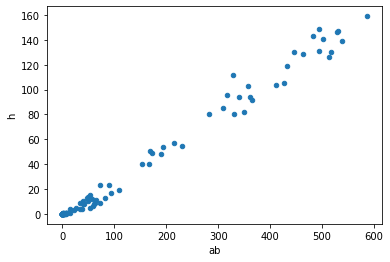

In [107]:
 baseball.plot.scatter(x='ab', y='h')

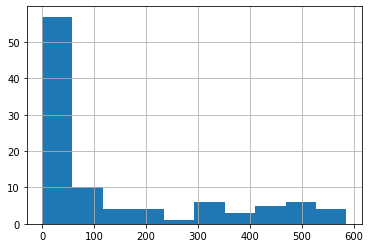

In [108]:
baseball['ab'].hist()

### Write to file

In [ ]:
mb.to_csv("mb.csv")

In [ ]:
baseball.to_pickle("baseball_pickle")

In [ ]:
pd.read_pickle("baseball_pickle").head()

## References

[1] [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) Wes McKinney